In [7]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.shape,test.shape

((42000, 785), (28000, 784))

In [8]:
train_X,train_y=train.iloc[:,1:].values,train.iloc[:,0].values

In [9]:
train_X.shape

(42000, 784)

In [16]:
train_X=train_X.reshape(train_X.shape[0],28,28)
test=test.values.reshape(test.shape[0],28,28)

In [11]:
train_X.shape

(42000, 28, 28)

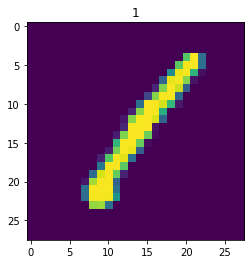

In [13]:
plt.imshow(train_X[0])
plt.title(train_y[0])
plt.show()

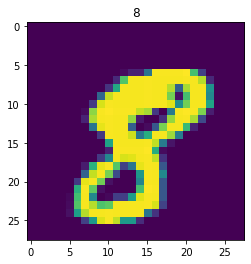

In [14]:
plt.imshow(train_X[10])
plt.title(train_y[10])
plt.show()

In [17]:
train_X=train_X/255
test=test/255

# Model

In [18]:
from tensorflow.keras.utils import to_categorical
train_y=to_categorical(train_y)


In [21]:
train_y.shape

(42000, 10)

In [23]:
train_X[0].shape[0]

28

In [24]:
train_X=train_X.reshape(train_X.shape[0],28,28,1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [34]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [39]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [40]:
history=model.fit(train_X,train_y,validation_split=0.2,batch_size=32,epochs=3)

Epoch 1/3
1050/1050 [==============================] - 10s 10ms/step - loss: 0.1705 - accuracy: 0.9453 - val_loss: 0.0667 - val_accuracy: 0.9786
Epoch 2/3
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0467 - val_accuracy: 0.9844
Epoch 3/3
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0453 - val_accuracy: 0.9870


Text(0, 0.5, 'accuracy')

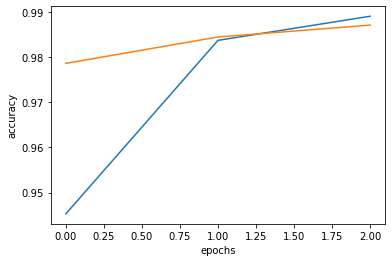

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel('accuracy')